# Ordinary Least Squares (OLS) Using Linear Algebra

## Step 1: Problem Setup

In the Ordinary Least Squares (OLS) regression, we aim to find the best-fitting line through a set of data points. The model is represented as:

$$
\mathbf{y} = \mathbf{X} \beta + \epsilon
$$

where:
- $ \mathbf{y} \in \mathbb{R}^{n \times 1} $ is the vector of observed values,
- $ \mathbf{X} \in \mathbb{R}^{n \times p} $ is the matrix of explanatory variables (design matrix),
- $ \beta \in \mathbb{R}^{p \times 1} $ is the vector of regression coefficients,
- $ \epsilon \in \mathbb{R}^{n \times 1} $ is the error term.

The goal is to estimate $ \beta $, the vector of coefficients, that minimizes the sum of squared errors (residuals):

$$
\hat{\beta} = \arg \min_{\beta} \| \mathbf{y} - \mathbf{X} \beta \|^2
$$

---

## Step 2: Objective Function

The objective function is the sum of squared residuals (errors), which we want to minimize. The residuals are given by:

$$
\mathbf{r} = \mathbf{y} - \mathbf{X} \beta
$$

The sum of squared residuals is:

$$
J(\beta) = \mathbf{r}^T \mathbf{r} = (\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta)
$$

Expanding this expression:

$$
J(\beta) = \mathbf{y}^T \mathbf{y} - 2 \beta^T \mathbf{X}^T \mathbf{y} + \beta^T \mathbf{X}^T \mathbf{X} \beta
$$

We need to minimize $ J(\beta) $ with respect to $ \beta $.

---

## Step 3: First-Order Condition

To minimize the objective function, we take the derivative of $ J(\beta) $ with respect to $ \beta $ and set it equal to zero:

$$
\frac{\partial J(\beta)}{\partial \beta} = -2 \mathbf{X}^T \mathbf{y} + 2 \mathbf{X}^T \mathbf{X} \beta
$$

Set this equal to zero:

$$
\mathbf{X}^T \mathbf{X} \hat{\beta} = \mathbf{X}^T \mathbf{y}
$$

This is the **Normal Equation** for OLS.

---

## Step 4: Solve for $\hat{\beta}$

To solve for $ \hat{\beta} $, multiply both sides of the equation by the inverse of $ \mathbf{X}^T \mathbf{X} $ (assuming it is invertible):

$$
\hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

This gives the solution to the OLS problem in terms of linear algebra.

---

## Step 5: Intuition

- The term $ \mathbf{X}^T \mathbf{X} $ is the Gram matrix, which captures the relationships between the features in $ \mathbf{X} $.
- The term $ \mathbf{X}^T \mathbf{y} $ is the vector of covariances between the features and the observed values.
- The solution $ \hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} $ is the vector of coefficients that minimizes the sum of squared residuals, thereby fitting the best line to the data.

---

## Step 6: Conclusion

The Ordinary Least Squares (OLS) estimator, $ \hat{\beta} $, provides the best linear fit to the data in the least squares sense. This method is widely used in regression analysis and is derived using linear algebra, specifically through the Normal Equation.


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

# Define toy data
x_data = np.arange(1, 11)  # Independent variable (1 to 10)
y_data = 2 * x_data + 3 + np.random.normal(0, 1, size=x_data.shape)  # Dependent variable with some noise

# Solve Ordinary Least Squares (OLS) using linear algebra
# y = Xw -> w = (X^T X)^-1 X^T y
X = np.vstack((np.ones_like(x_data), x_data)).T  # Design matrix with bias term
Y = y_data.reshape(-1, 1)  # Reshape y_data to a column vector

# Compute weights step by step
XT_X = X.T @ X  # Step 1: Compute X^T X
XT_X_inv = np.linalg.inv(XT_X)  # Step 2: Compute (X^T X)^-1
XT_Y = X.T @ Y  # Step 3: Compute X^T Y
w = XT_X_inv @ XT_Y  # Step 4: Compute weights

# Extract slope and intercept
intercept, slope = w[0, 0], w[1, 0]

# Display the OLS solution
print(f"OLS Solution: Intercept = {intercept:.4f}, Slope = {slope:.4f}")

# Compute predictions and residuals
predictions = intercept + slope * x_data
residuals = y_data - predictions

# Create a DataFrame to display samples
data_df = pd.DataFrame({
    'x': x_data,
    'y': y_data,
    'Prediction': predictions,
    'Residual': residuals
})
print("\nSample Data with Predictions and Residuals:")
data_df

OLS Solution: Intercept = 3.0594, Slope = 1.9882

Sample Data with Predictions and Residuals:


,x,y,Prediction,Residual
0,1,5.277329,5.047553,0.229776
1,2,7.049336,7.035715,0.013621
2,3,8.457719,9.023878,-0.566158
3,4,11.753243,11.012040,0.741203
4,5,13.080114,13.000202,0.079912
5,6,14.630650,14.988364,-0.357715
6,7,17.108784,16.976527,0.132257
7,8,18.068551,18.964689,-0.896138
8,9,20.718587,20.952851,-0.234264
9,10,23.798519,22.941014,0.857505


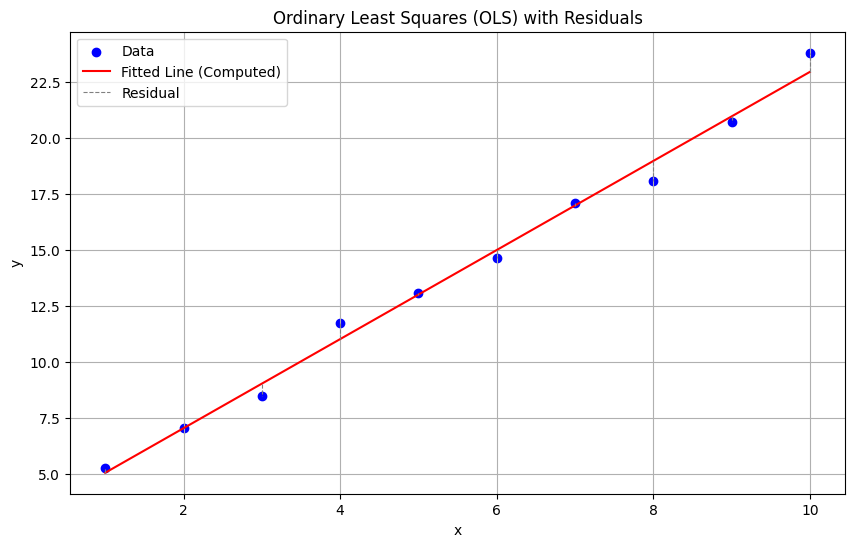

In [ ]:
# Plot the data, fitted line, and residuals
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', label='Data')
plt.plot(x_data, predictions, color='red', label='Fitted Line (Computed)')

# Add residuals as lines
for i in range(len(x_data)):
    plt.vlines(x=x_data[i], ymin=predictions[i], ymax=y_data[i], color='gray', linestyle='dashed', linewidth=0.8, label='Residual' if i == 0 else "")

plt.title('Ordinary Least Squares (OLS) with Residuals')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Sample Data with Predictions, Residuals, and Squared Residuals:

    x          y  Prediction  Residual  Squared Residual
0   1   5.035171         3.7  1.335171          1.782682
1   2   8.697357         5.9  2.797357          7.825207
2   3   9.361056         8.1  1.261056          1.590263
3   4  11.083317        10.3  0.783317          0.613586
4   5  12.778277        12.5  0.278277          0.077438
5   6  16.624112        14.7  1.924112          3.702205
6   7  18.057058        16.9  1.157058          1.338783
7   8  18.748915        19.1 -0.351085          0.123261
8   9  23.017876        21.3  1.717876          2.951096
9  10  23.374175        23.5 -0.125825          0.015832


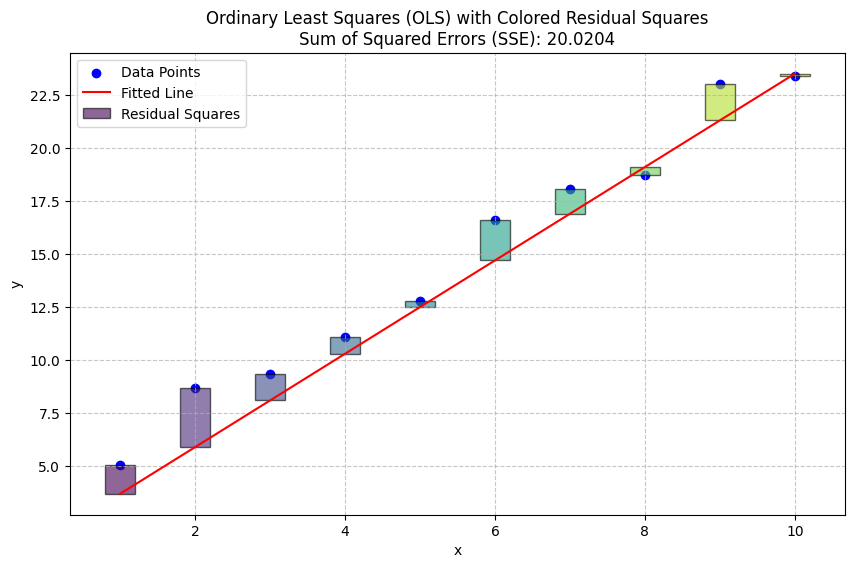


Regression Parameters:
Intercept: 1.5000
Slope: 2.2000
Sum of Squared Errors (SSE): 20.0204


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

# Define toy data
x_data = np.arange(1, 11)  # Independent variable (1 to 10)
y_data = 2 * x_data + 3 + np.random.normal(0, 1, size=x_data.shape)  # Dependent variable with some noise

# Modified intercept and slope
intercept, slope = 1.5, 2.2  # Modified intercept and slope

# Compute predictions and residuals
predictions = intercept + slope * x_data
residuals = y_data - predictions
squared_residuals = residuals**2
sse = np.sum(squared_residuals)  # Sum of squared errors

# Create a DataFrame to display samples
data_df = pd.DataFrame({
    'x': x_data,
    'y': y_data,
    'Prediction': predictions,
    'Residual': residuals,
    'Squared Residual': squared_residuals
})
print("\nSample Data with Predictions, Residuals, and Squared Residuals:\n")
print(data_df)

# Plot the data, fitted line, and residuals
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', label='Data Points')
plt.plot(x_data, predictions, color='red', label='Fitted Line')

# Add residuals as colored squares
colors = plt.cm.viridis(np.linspace(0, 1, len(x_data)))
for i in range(len(x_data)):
    # Determine the direction of the rectangle (up or down based on residual sign)
    rect_height = residuals[i]
    rect_y = predictions[i] if residuals[i] > 0 else predictions[i] + residuals[i]

    plt.gca().add_patch(plt.Rectangle(
        (x_data[i] - 0.2, rect_y),
        0.4,
        abs(rect_height),
        facecolor=colors[i],  # Explicitly set facecolor
        edgecolor='black',    # Explicitly set edgecolor
        alpha=0.6,
        label='Residual Squares' if i == 0 else "",
        linewidth=1
    ))

plt.title(f'Ordinary Least Squares (OLS) with Colored Residual Squares\nSum of Squared Errors (SSE): {sse:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Print additional statistical information
print(f"\nRegression Parameters:")
print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"Sum of Squared Errors (SSE): {sse:.4f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Generate synthetic data
np.random.seed(42)
x_data = np.arange(1, 11)  # Independent variable (1 to 10)
true_intercept, true_slope = 3, 2
y_data = true_slope * x_data + true_intercept + np.random.normal(0, 1, size=x_data.shape)

def compute_sse(intercept, slope):
    """
    Compute Sum of Squared Errors for given intercept and slope
    """
    predictions = intercept + slope * x_data
    residuals = y_data - predictions
    return np.sum(residuals**2)

def update_plot(intercept, slope):
    """
    Update the main plot based on intercept and slope
    """
    # Compute predictions and residuals
    predictions = intercept + slope * x_data
    residuals = y_data - predictions

    # Clear the current plot
    plt.close()  # Close the previous figure to avoid <Figure size 640x480 with 0 Axes>

    # Main plot with data points, predicted points, and regression line
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x_data, predictions, color='red', label='Regression Line')
    ax.scatter(x_data, y_data, color='blue', label='Actual Data Points')
    # Plot predicted points as stars after the regression line
    ax.scatter(x_data, predictions, color='black', marker='*', s=100, label='Predicted Points')

    # Add residual squares
    colors = plt.cm.viridis(np.linspace(0, 1, len(x_data)))
    for i in range(len(x_data)):
        rect_height = residuals[i]
        rect_y = predictions[i] if residuals[i] > 0 else predictions[i] + residuals[i]
        ax.add_patch(plt.Rectangle(
            (x_data[i] - 0.2, rect_y), 0.4, abs(rect_height),
            facecolor=colors[i], edgecolor='black', alpha=0.6))

    # Display SSE
    sse = compute_sse(intercept, slope)
    ax.set_title(f'OLS Regression Simulation\nSum of Squared Errors: {sse:.4f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    plt.show()

# Use ipywidgets sliders for interactivity
interact(update_plot,
         intercept=FloatSlider(value=3, min=0, max=6, step=0.1, description='Intercept'),
         slope=FloatSlider(value=2, min=0, max=4, step=0.1, description='Slope'))

interactive(children=(FloatSlider(value=3.0, description='Intercept', max=6.0), FloatSlider(value=2.0, descrip…

<function __main__.update_plot(intercept, slope)>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Output

# Generate synthetic data
np.random.seed(42)
x_data = np.arange(1, 11)  # Independent variable (1 to 10)
true_intercept, true_slope = 3, 2
y_data = true_slope * x_data + true_intercept + np.random.normal(0, 1, size=x_data.shape)

def compute_sse(intercept, slope):
    """
    Compute Sum of Squared Errors for given intercept and slope
    """
    predictions = intercept + slope * x_data
    residuals = y_data - predictions
    return np.sum(residuals**2)

def update_plot(intercept, slope):
    """
    Update the main plot and display the DataFrame based on intercept and slope
    """
    # Compute predictions and residuals
    predictions = intercept + slope * x_data
    residuals = y_data - predictions

    # Create and display the DataFrame
    df = pd.DataFrame({
        'x': x_data,
        'Actual y': y_data,
        'Predicted y': predictions,
        'Residuals': residuals
    })
    display(df)  # Display the DataFrame in the output

    # Clear the current plot
    plt.close()  # Close the previous figure to avoid <Figure size 640x480 with 0 Axes>

    # Main plot with data points, predicted points, and regression line
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x_data, predictions, color='red', label='Regression Line')
    ax.scatter(x_data, y_data, color='blue', label='Actual Data Points')
    # Plot predicted points as stars after the regression line
    ax.scatter(x_data, predictions, color='black', marker='*', s=100, label='Predicted Points')

    # Add residual squares
    colors = plt.cm.viridis(np.linspace(0, 1, len(x_data)))
    for i in range(len(x_data)):
        rect_height = residuals[i]
        rect_y = predictions[i] if residuals[i] > 0 else predictions[i] + residuals[i]
        ax.add_patch(plt.Rectangle(
            (x_data[i] - 0.2, rect_y), 0.4, abs(rect_height),
            facecolor=colors[i], edgecolor='black', alpha=0.6))

    # Display SSE
    sse = compute_sse(intercept, slope)
    ax.set_title(f'OLS Regression Simulation\nSum of Squared Errors: {sse:.4f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    plt.show()

# Output widget to prevent overlapping outputs
output = Output()

def interact_callback(intercept, slope):
    with output:
        output.clear_output(wait=True)  # Clear previous output
        update_plot(intercept, slope)

# Use ipywidgets sliders for interactivity
interact(interact_callback,
         intercept=FloatSlider(value=3, min=0, max=6, step=0.1, description='Intercept'),
         slope=FloatSlider(value=2, min=0, max=4, step=0.1, description='Slope'))

display(output)  # Display the output widget

interactive(children=(FloatSlider(value=3.0, description='Intercept', max=6.0), FloatSlider(value=2.0, descrip…

Output()